<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230904.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns #그래프
import numpy as np #숫자

import matplotlib.pyplot as plt #그래프
from matplotlib import rc, font_manager

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv")
df.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


In [7]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [8]:
num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']
cg = ['구매금액대', '고객등급' ]

In [9]:
X = df[num+cg]
X.head()

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
0,4963160,225598,1,5445,1,1
1,2271520,59777,22,350995,0,1
2,2484250,1242125,6,186045,0,1
3,2778850,308761,1,5195,0,2
4,4437610,443761,9,246350,1,2


In [10]:
Y = df['할인민감여부']
Y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    0
Name: 할인민감여부, Length: 1000, dtype: int64

In [11]:
# 표준화, 원핫인코딩 : 컬럼트랜스포머

ct = ColumnTransformer([('scaling', StandardScaler(), num),('onehot', OneHotEncoder(sparse = False), cg)])
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '고객등급'])])

In [12]:
ct.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '고객등급'])])

In [13]:
X = ct.transform(X)

In [14]:
X

array([[-0.15402195, -0.40506369, -1.80241189, ...,  0.        ,
         1.        ,  0.        ],
       [-0.6173064 , -0.93601823,  0.71643084, ...,  0.        ,
         1.        ,  0.        ],
       [-0.58069136,  2.84982941, -1.20268743, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.21444631,  0.00856412, -0.96279765, ...,  0.        ,
         0.        ,  1.        ],
       [-0.11921933, -0.53673207,  0.47654106, ...,  0.        ,
         1.        ,  0.        ],
       [-0.26419753, -0.26227806,  0.35659616, ...,  0.        ,
         0.        ,  1.        ]])

In [15]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8
0,-0.154022,-0.405064,-1.802412,-2.564558,0.0,1.0,0.0,1.0,0.0
1,-0.617306,-0.936018,0.716431,0.523977,1.0,0.0,0.0,1.0,0.0
2,-0.580691,2.849829,-1.202687,-0.950351,1.0,0.0,0.0,1.0,0.0
3,-0.529985,-0.138778,-1.802412,-2.566793,1.0,0.0,0.0,0.0,1.0
4,-0.244479,0.293489,-0.842853,-0.411343,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,1.183073,0.037324,-1.562522,-2.215975,0.0,0.0,1.0,0.0,1.0
996,-0.419801,0.697174,-1.202687,-0.945882,1.0,0.0,0.0,1.0,0.0
997,-0.214446,0.008564,-0.962798,-0.283082,0.0,1.0,0.0,0.0,1.0
998,-0.119219,-0.536732,0.476541,0.494526,0.0,1.0,0.0,1.0,0.0


In [16]:
Y = pd.DataFrame(Y)
Y

,할인민감여부
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [17]:
data = pd.concat([X, Y], axis = 1)
data

,0,1,2,3,4,5,6,7,8,할인민감여부
0,-0.154022,-0.405064,-1.802412,-2.564558,0.0,1.0,0.0,1.0,0.0,0
1,-0.617306,-0.936018,0.716431,0.523977,1.0,0.0,0.0,1.0,0.0,0
2,-0.580691,2.849829,-1.202687,-0.950351,1.0,0.0,0.0,1.0,0.0,0
3,-0.529985,-0.138778,-1.802412,-2.566793,1.0,0.0,0.0,0.0,1.0,0
4,-0.244479,0.293489,-0.842853,-0.411343,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
995,1.183073,0.037324,-1.562522,-2.215975,0.0,0.0,1.0,0.0,1.0,1
996,-0.419801,0.697174,-1.202687,-0.945882,1.0,0.0,0.0,1.0,0.0,1
997,-0.214446,0.008564,-0.962798,-0.283082,0.0,1.0,0.0,0.0,1.0,1
998,-0.119219,-0.536732,0.476541,0.494526,0.0,1.0,0.0,1.0,0.0,0


In [18]:
data.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, '할인민감여부'], dtype='object')

In [19]:
data.columns = ['총매출액', 'X1회_평균매출액', '할인권_사용_횟수', '총_할인_금액', '구매금액대1', '구매금액대2', '구매금액대3', '고객등급1', '고객등급2', '할인민감여부']

In [20]:
data

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대2,구매금액대3,고객등급1,고객등급2,할인민감여부
0,-0.154022,-0.405064,-1.802412,-2.564558,0.0,1.0,0.0,1.0,0.0,0
1,-0.617306,-0.936018,0.716431,0.523977,1.0,0.0,0.0,1.0,0.0,0
2,-0.580691,2.849829,-1.202687,-0.950351,1.0,0.0,0.0,1.0,0.0,0
3,-0.529985,-0.138778,-1.802412,-2.566793,1.0,0.0,0.0,0.0,1.0,0
4,-0.244479,0.293489,-0.842853,-0.411343,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
995,1.183073,0.037324,-1.562522,-2.215975,0.0,0.0,1.0,0.0,1.0,1
996,-0.419801,0.697174,-1.202687,-0.945882,1.0,0.0,0.0,1.0,0.0,1
997,-0.214446,0.008564,-0.962798,-0.283082,0.0,1.0,0.0,0.0,1.0,1
998,-0.119219,-0.536732,0.476541,0.494526,0.0,1.0,0.0,1.0,0.0,0


In [21]:
data.corr()     # num 변수들간의 상관관계 확인

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대2,구매금액대3,고객등급1,고객등급2,할인민감여부
총매출액,1.000000,0.287319,0.014660,0.005145,-0.508838,-0.050836,0.694287,-0.398660,0.398660,0.381985
X1회_평균매출액,0.287319,1.000000,0.039667,0.045868,-0.201397,-0.029884,0.285982,-0.221294,0.221294,0.079668
할인권_사용_횟수,0.014660,0.039667,1.000000,0.848666,0.001080,-0.017563,0.018771,0.009815,-0.009815,-0.017334
총_할인_금액,0.005145,0.045868,0.848666,1.000000,-0.011003,0.001336,0.012224,-0.012142,0.012142,-0.011825
구매금액대1,-0.508838,-0.201397,0.001080,-0.011003,1.000000,-0.654654,-0.500000,0.650760,-0.650760,-0.281691
구매금액대2,-0.050836,-0.029884,-0.017563,0.001336,-0.654654,1.000000,-0.327327,-0.342746,0.342746,-0.048998
구매금액대3,0.694287,0.285982,0.018771,0.012224,-0.500000,-0.327327,1.000000,-0.420785,0.420785,0.408248
고객등급1,-0.398660,-0.221294,0.009815,-0.012142,0.650760,-0.342746,-0.420785,1.000000,-1.000000,-0.182854
고객등급2,0.398660,0.221294,-0.009815,0.012142,-0.650760,0.342746,0.420785,-1.000000,1.000000,0.182854
할인민감여부,0.381985,0.079668,-0.017334,-0.011825,-0.281691,-0.048998,0.408248,-0.182854,0.182854,1.000000


In [22]:
data.describe()

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대2,구매금액대3,고객등급1,고객등급2,할인민감여부
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000
mean,0.000000,-4.263256e-17,-1.367795e-16,1.456613e-16,0.50000,0.300000,0.2000,0.454000,0.546000,0.400000
std,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,0.50025,0.458487,0.4002,0.498129,0.498129,0.490143
min,-0.683645,-1.040707e+00,-1.802412e+00,-2.579708e+00,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,-0.523607,-6.051030e-01,-8.428528e-01,-2.742671e-01,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,-0.303941,-3.006473e-01,1.167064e-01,4.927385e-01,0.50000,0.000000,0.0000,0.000000,1.000000,0.000000
75%,0.118312,2.392792e-01,8.363757e-01,6.527292e-01,1.00000,1.000000,0.0000,1.000000,1.000000,1.000000
max,10.626287,7.833302e+00,1.675990e+00,9.673477e-01,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000


In [23]:
data_cg = pd.crosstab([data.구매금액대1, data.구매금액대2], data.구매금액대3) # cg의 변수들간의 상관관계를 확인하기 위해서 crosstab으로 확인

In [24]:
from scipy.stats import chi2_contingency #카이스퀘어 값 뽑아주는 함수

In [25]:
chi2_data = chi2_contingency(data_cg)

In [26]:
print('카이제곱 통계량 : ', chi2_data[0])

카이제곱 통계량 :  1000.0


In [27]:
print('p-value : ' , chi2_data[1])

p-value :  7.124576406741474e-218


In [28]:
print('자유도 : ', chi2_data[2])

자유도 :  2


In [29]:
print('기대도수 : \n', chi2_data[3])

기대도수 : 
 [[160.  40.]
 [240.  60.]
 [400. 100.]]


In [30]:
data_cg2 = pd.crosstab(data.고객등급1, data.고객등급2)
data_cg2

고객등급2,0.0,1.0
고객등급1,,
0.0,0,546
1.0,454,0


In [31]:
chi2_data2 = chi2_contingency(data_cg2)

In [32]:
chi2_data2

Chi2ContingencyResult(statistic=995.9699235781688, pvalue=1.3497738535217839e-218, dof=1, expected_freq=array([[247.884, 298.116],
       [206.116, 247.884]]))

In [33]:
logit("Y~X", data = data).fit().summary()

         Current function value: 0.549894
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.1829
Time:                        06:19:46   Log-Likelihood:                -549.89
converged:                      False   LL-Null:                       -673.01
Covariance Type:            nonrobust   LLR p-value:                 1.753e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0951        nan        nan        nan         nan         nan
X[0]           2.7436      0.460      5.969      0.000       1.843       3.644
X[1]          -0.1950      0.085     -2.283      0.022      -0.362      -0.028
X[2]          -0.1119      0.140     -0.802      0.423      -0.386       0.162
X[3]           0.0561      0.137      0.409      0.683      -0.213       0.325
X[4]           0.3042   5.27e+06   5.77e-08      1.000   -1.03e+07    1.03e+07
X[5]          -0.1013   5.27e+06  -1.92e-08      1.000   -1.03e+07    1.03e+07
X[6]          -0.2980   5.27e+06  -5.66e-08      1.000   -1.03e+07    1.03e+07
X[7]           0.1838        nan        nan        nan         nan         nan
X[8]          -0.2789        nan        nan        nan         nan         nan
==============================================================================
"""

In [34]:
logit("할인민감여부~총매출액+X1회_평균매출액+할인권_사용_횟수+총_할인_금액+구매금액대1+구매금액대2+구매금액대3+고객등급1", data = data).fit().summary()

Optimization terminated successfully.
         Current function value: 0.549894
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 할인민감여부   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.1829
Time:                        06:19:46   Log-Likelihood:                -549.89
converged:                       True   LL-Null:                       -673.01
Covariance Type:            nonrobust   LLR p-value:                 1.082e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3043   6.42e+06  -4.74e-08      1.000   -1.26e+07    1.26e+07
총매출액           2.7436      0.460      5.969      0.000       1.843       3.644
X1회_평균매출액     -0.1950      0.085     -2.283      0.022      -0.362      -0.028
할인권_사용_횟수     -0.1119      0.140     -0.802      0.423      -0.386       0.162
총_할인_금액        0.0561      0.137      0.409      0.683      -0.213       0.325
구매금액대1         0.2345   6.42e+06   3.65e-08      1.000   -1.26e+07    1.26e+07
구매금액대2        -0.1711   6.42e+06  -2.67e-08      1.000   -1.26e+07    1.26e+07
구매금액대3        -0.3677   6.42e+06  -5.73e-08      1.000   -1.26e+07    1.26e+07
고객등급1          0.4627      0.201      2.304      0.021       0.069       0.856
==============================================================================
"""

In [35]:
logit("할인민감여부~총매출액+X1회_평균매출액+할인권_사용_횟수+총_할인_금액+구매금액대1+구매금액대3+고객등급1", data = data).fit().summary() #연관성이 있는 독립변수들은 뺐음

Optimization terminated successfully.
         Current function value: 0.549894
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 할인민감여부   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.1829
Time:                        06:19:46   Log-Likelihood:                -549.89
converged:                       True   LL-Null:                       -673.01
Covariance Type:            nonrobust   LLR p-value:                 1.753e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4753      0.131     -3.628      0.000      -0.732      -0.219
총매출액           2.7436      0.460      5.969      0.000       1.843       3.644
X1회_평균매출액     -0.1950      0.085     -2.283      0.022      -0.362      -0.028
할인권_사용_횟수     -0.1119      0.140     -0.802      0.423      -0.386       0.162
총_할인_금액        0.0561      0.137      0.409      0.683      -0.213       0.325
구매금액대1         0.4056      0.267      1.521      0.128      -0.117       0.928
구매금액대3        -0.1967      0.376     -0.524      0.601      -0.933       0.540
고객등급1          0.4627      0.201      2.304      0.021       0.069       0.856
==============================================================================
"""

In [36]:
# 결측치 제거 --> 없음
X.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [37]:
Y.isnull().sum()

할인민감여부    0
dtype: int64

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


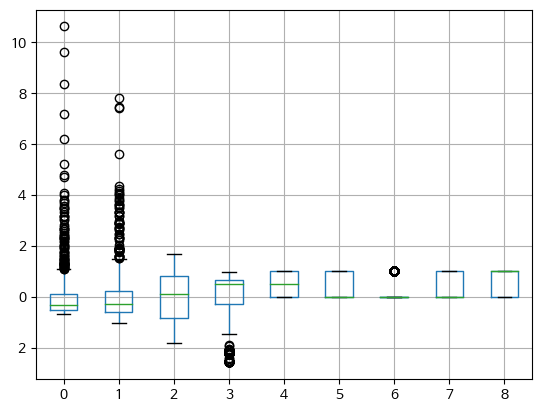

In [38]:
# 이상치 제거
X.boxplot()

In [39]:
X.columns

RangeIndex(start=0, stop=9, step=1)

In [40]:
X.columns = ['총매출액', 'X1회_평균매출액', '할인권_사용_횟수', '총_할인_금액', '구매금액대1', '구매금액대2', '구매금액대3', '고객등급1', '고객등급2']
X

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대2,구매금액대3,고객등급1,고객등급2
0,-0.154022,-0.405064,-1.802412,-2.564558,0.0,1.0,0.0,1.0,0.0
1,-0.617306,-0.936018,0.716431,0.523977,1.0,0.0,0.0,1.0,0.0
2,-0.580691,2.849829,-1.202687,-0.950351,1.0,0.0,0.0,1.0,0.0
3,-0.529985,-0.138778,-1.802412,-2.566793,1.0,0.0,0.0,0.0,1.0
4,-0.244479,0.293489,-0.842853,-0.411343,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,1.183073,0.037324,-1.562522,-2.215975,0.0,0.0,1.0,0.0,1.0
996,-0.419801,0.697174,-1.202687,-0.945882,1.0,0.0,0.0,1.0,0.0
997,-0.214446,0.008564,-0.962798,-0.283082,0.0,1.0,0.0,0.0,1.0
998,-0.119219,-0.536732,0.476541,0.494526,0.0,1.0,0.0,1.0,0.0


In [41]:
col = ['총매출액', 'X1회_평균매출액', '할인권_사용_횟수', '총_할인_금액', '구매금액대1', '구매금액대3', '고객등급1']

In [42]:
X = X[col]
X   # X 최종선택 완료

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대3,고객등급1
0,-0.154022,-0.405064,-1.802412,-2.564558,0.0,0.0,1.0
1,-0.617306,-0.936018,0.716431,0.523977,1.0,0.0,1.0
2,-0.580691,2.849829,-1.202687,-0.950351,1.0,0.0,1.0
3,-0.529985,-0.138778,-1.802412,-2.566793,1.0,0.0,0.0
4,-0.244479,0.293489,-0.842853,-0.411343,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,1.183073,0.037324,-1.562522,-2.215975,0.0,1.0,0.0
996,-0.419801,0.697174,-1.202687,-0.945882,1.0,0.0,1.0
997,-0.214446,0.008564,-0.962798,-0.283082,0.0,0.0,0.0
998,-0.119219,-0.536732,0.476541,0.494526,0.0,0.0,1.0


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#train, test를 split 하는 과정. random_state 는 그냥 0으로 넣으면 됨. train:test = 7:3

print(X_train.head())
print('----------------------------------')
print(X_test.head())
print('----------------------------------')
print(Y_train.head())
print('----------------------------------')
print(Y_test.head())

         총매출액  X1회_평균매출액  할인권_사용_횟수   총_할인_금액  구매금액대1  구매금액대3  고객등급1
105  0.645015   0.154100   1.675990  0.207615     0.0     1.0    0.0
68  -0.226789  -0.400510   0.596486  0.497207     0.0     0.0    0.0
479 -0.507102  -0.905433  -0.602963  0.040430     1.0     0.0    1.0
399  0.570532   0.504294   0.236651  0.434194     0.0     1.0    0.0
434 -0.573674  -0.622106   0.116706  0.648215     1.0     0.0    1.0
----------------------------------
         총매출액  X1회_평균매출액  할인권_사용_횟수   총_할인_금액  구매금액대1  구매금액대3  고객등급1
993  0.561210   0.819077   0.476541  0.498504     0.0     1.0    0.0
859  1.973225   1.183637   0.956321  0.597760     0.0     1.0    0.0
298  0.377023   4.026782   0.836376  0.786755     0.0     1.0    0.0
553  0.290443  -0.787136   0.836376  0.786308     0.0     1.0    0.0
672  0.911158  -0.466170  -0.962798 -0.369468     0.0     1.0    0.0
----------------------------------
     할인민감여부
105       1
68        0
479       0
399       1
434       0
------------------------------

In [44]:
from imblearn.over_sampling import SMOTE # imbalance learning
from collections import Counter

In [45]:
smote = SMOTE(random_state = 0)

In [46]:
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)

In [47]:
X_train_df= pd.DataFrame(X_train_over)
X_train_df.describe()

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대3,고객등급1
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.062094,-0.029386,-0.042257,-0.038348,0.466653,0.231678,0.433409
std,1.011913,0.958205,1.004963,1.020869,0.498328,0.422154,0.494870
min,-0.683645,-1.040707,-1.802412,-2.579708,0.000000,0.000000,0.000000
25%,-0.505077,-0.597663,-0.962798,-0.313787,0.000000,0.000000,0.000000
50%,-0.262144,-0.310026,0.116706,0.487837,0.000000,0.000000,0.000000
75%,0.212373,0.187770,0.716431,0.648260,1.000000,0.000000,1.000000
max,10.626287,7.833302,1.675990,0.967348,1.000000,1.000000,1.000000


In [48]:
Y_train_over_df= pd.DataFrame(Y_train_over)
Y_train_over_df.describe()

,할인민감여부
count,846.000000
mean,0.500000
std,0.500296
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [49]:
Counter(Y_train_over_df)

Counter({'할인민감여부': 1})

In [50]:
Y_train_over_df.head(100)

,할인민감여부
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,0
98,1


#ML 로지스틱 회귀

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [52]:
lg_model = LogisticRegression(random_state = 0)

In [53]:
lg_model.fit(X_train_over, Y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [54]:
Y_pred = lg_model.predict(X_test) #X_test를 가지고, 만든 모델의 예측값 y^을 만든다

In [55]:
print(Y_pred)

[1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0]


In [56]:
cr = classification_report(Y_test, Y_pred)
print(cr)
# f1 score 확인!

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       177
           1       0.70      0.51      0.59       123

    accuracy                           0.71       300
   macro avg       0.71      0.68      0.68       300
weighted avg       0.71      0.71      0.70       300



In [81]:
import numpy as np
coeff = pd.DataFrame(data = np.round(lg_model.coef_, 2))
coeff.columns = X.columns
coeff

,총매출액,X1회_평균매출액,할인권_사용_횟수,총_할인_금액,구매금액대1,구매금액대3,고객등급1
0,1.98,-0.23,-0.09,0.09,0.09,0.25,0.37


### K-NN 모형


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
kn_model = KNeighborsClassifier()

In [60]:
kn_model.fit(X_train_over, Y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
Y_pred_kn = kn_model.predict(X_test)

In [62]:
print(Y_pred_kn)

[1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0]


In [63]:
cr_kn = classification_report(Y_test, Y_pred_kn)
print(cr_kn)

# f1 score 확인 시, 앞서 학습시킨 lm 모델보다 성능이 좋은 것을 알 수 있음

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       177
           1       0.53      0.62      0.57       123

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.63      0.62      0.62       300



### Decision Tree 의사결정나무

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt_model = DecisionTreeClassifier()

In [66]:
dt_model.fit(X_train_over, Y_train_over)

DecisionTreeClassifier()

In [67]:
Y_pred_dt = dt_model.predict(X_test)

In [68]:
print(Y_pred_dt)

[1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 1]


In [69]:
cr_dt = classification_report(Y_test, Y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.71      0.68      0.70       177
           1       0.57      0.59      0.58       123

    accuracy                           0.65       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.65      0.65      0.65       300



In [70]:
# 변수 중요도 feature importance

feature_name = X.columns
feature_importance = dt_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True) #feature_importance 가 높은 순서로 sort (reverse = True 면 내림차순)

[(0.42285509010112116, '총매출액'),
 (0.2444496468096974, 'X1회_평균매출액'),
 (0.20334684730588024, '총_할인_금액'),
 (0.10572327140889334, '할인권_사용_횟수'),
 (0.018252266661104705, '고객등급1'),
 (0.0034816247582205024, '구매금액대3'),
 (0.0018912529550827437, '구매금액대1')]

In [71]:
from sklearn.tree import export_graphviz
import graphviz

In [72]:
export_graphviz(dt_model, class_names=['할인민감','할인둔감'], feature_names=feature_name, filled =True,
                out_file='tree.dot')  #tree 모델 안의 tree 구조를 tree.dot 이라는 파일로 추출함

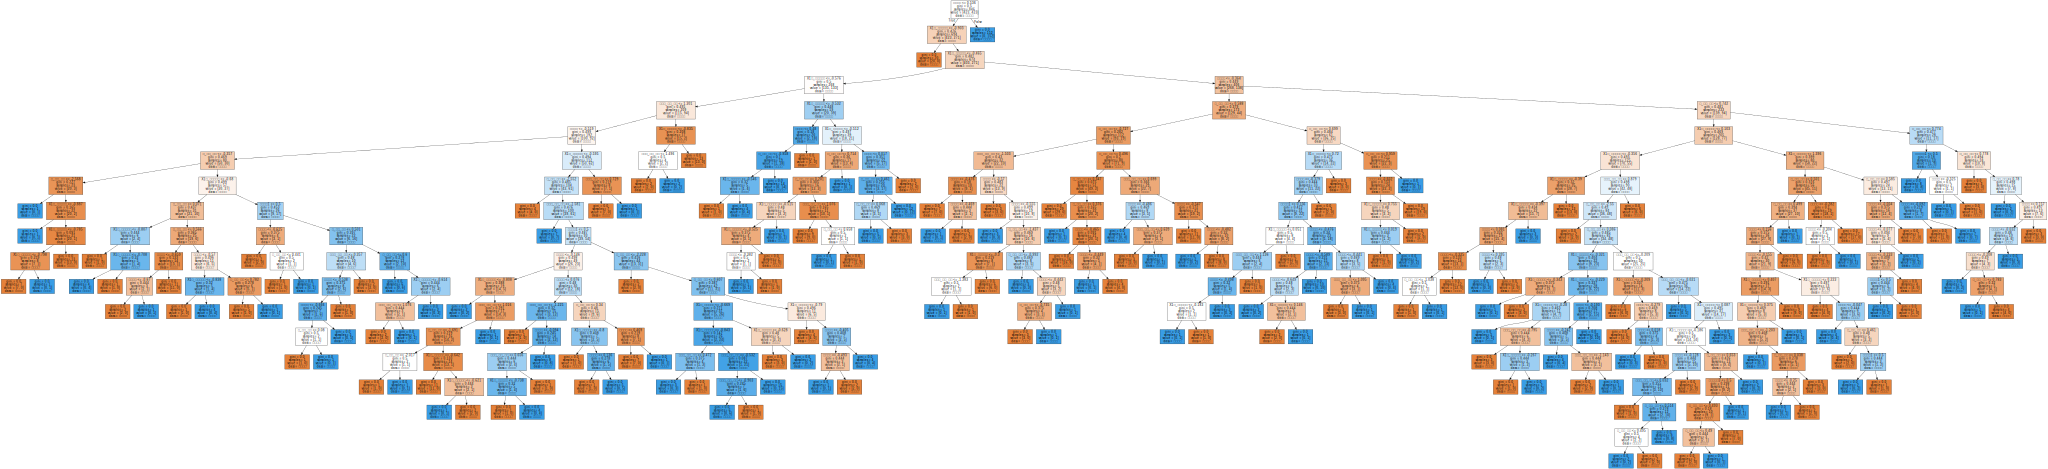

In [73]:
with open('tree.dot', encoding = 'utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#20230828 머신러닝

### SVM (서포트 벡터 머신)

In [74]:
from sklearn.svm import SVC

In [75]:
svm_model = SVC(C=100)

In [76]:
svm_model.fit(X_train_over, Y_train_over)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100)

In [77]:
Y_pred_svm = svm_model.predict(X_test)

In [78]:
print(Y_pred_svm)

[1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 0]


In [79]:
cr_svm = classification_report(Y_test, Y_pred_svm)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       177
           1       0.67      0.47      0.56       123

    accuracy                           0.69       300
   macro avg       0.69      0.66      0.66       300
weighted avg       0.69      0.69      0.68       300



In [80]:
print(svm_model.decision_function)

<bound method BaseSVC.decision_function of SVC(C=100)>
